In [1]:
#Importing the libraries
from ExoPSI import exopsi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Initializing the class
exopsi = exopsi()

In [3]:
P_df = pd.read_csv(r"phl_exoplanet_catalog.csv") 
new_df = P_df.loc[P_df['S_TEMPERATURE'].isna()==False]
new_df = new_df.loc[P_df['S_RADIUS'].isna()==False]
new_df = new_df.loc[P_df['S_MASS'].isna()==False]
new_df = new_df.loc[P_df['S_LUMINOSITY'].isna()==False]
new_df = new_df.loc[P_df['P_TEMP_SURF'].isna()==False]
new_df = new_df.loc[new_df['P_RADIUS'].isna()==False]
new_df = new_df.loc[new_df['P_MASS'].isna()==False]
new_df = new_df.loc[new_df['P_ESCAPE'].isna()==False]
new_df = new_df.loc[new_df['P_NAME'].isna()==False]
P_df = new_df
red_df = P_df.loc[:,['P_NAME','P_RADIUS','P_MASS','P_ESCAPE','P_TEMP_SURF','S_TEMPERATURE','S_RADIUS','S_MASS','S_LUMINOSITY']]
red_df.to_csv("reduced phl4.csv")
P_df = red_df
print(P_df)

            P_NAME  P_RADIUS    P_MASS  P_ESCAPE  P_TEMP_SURF  S_TEMPERATURE  \
30        55 Cnc e   1.87207  7.990196  2.065940   2066.94610         5172.0   
33        61 Vir b   2.10748  5.085248  1.553368   1214.70880         5577.0   
63    BD-06 1339 b   2.84734  8.581356  1.736034    772.23385         4324.0   
72        CD Cet b   1.81602  3.950602  1.474930    492.19235         3130.0   
110      CoRoT-7 b   1.68150  4.077733  1.557259   1867.63490         5275.0   
...            ...       ...       ...       ...          ...            ...   
5204      pi Men c   2.06264  3.629596  1.326531   1203.64660         6037.0   
5210     tau Cet e   1.80481  3.931532  1.475928    328.42972         5310.0   
5211     tau Cet f   1.80481  3.931532  1.475928    208.66189         5310.0   
5212     tau Cet g   1.17705  1.751232  1.219760    661.75475         5310.0   
5213     tau Cet h   1.18826  1.830689  1.241228    488.04629         5310.0   

      S_RADIUS  S_MASS  S_LUMINOSITY  


In [4]:
#Create dataset for Solar System Planets
solar_system_df = pd.read_csv(r"solar_system.csv")
solar_system_df

,P_NAME,P_RADIUS,P_MASS,P_ESCAPE,P_TEMP_SURF,S_TEMPERATURE,S_RADIUS,S_MASS,S_LUMINOSITY
0,Mercury,0.382,0.055,0.383,440,5772,1,1,1
1,Venus,0.949,0.815,0.925,740,5772,1,1,1
2,Earth,1.000,1.000,1.000,288,5772,1,1,1
3,Mars,0.532,0.107,0.450,208,5772,1,1,1
4,Jupiter,10.973,317.800,5.313,163,5772,1,1,1
5,Saturn,9.140,95.160,3.222,133,5772,1,1,1
6,Neptune,3.860,17.150,2.090,73,5772,1,1,1


In [5]:
upper_lims =[1.9, 10, 1.4, 323,5200,0.96,0.8,0.6]
lower_lims = [0.5, 0.1, 0.4, 273,3700,0.7,0.45,0.08]
ref_val = [1.1,1.5,1.17,293,4450,0.8,0.6,0.3]
weights = exopsi.calc_weight(ref_val,upper_lims,lower_lims)

The calculated weight(s) is(are): [0.58, 0.13, 0.89, 5.27, 2.52, 2.75, 1.45, 0.38]


C:\Users\mailm\AppData\Local\Temp\ipykernel_4716\3386480836.py:4: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  writer = pd.ExcelWriter("PSI_example.xlsx",engine='xlsxwriter',options=options)


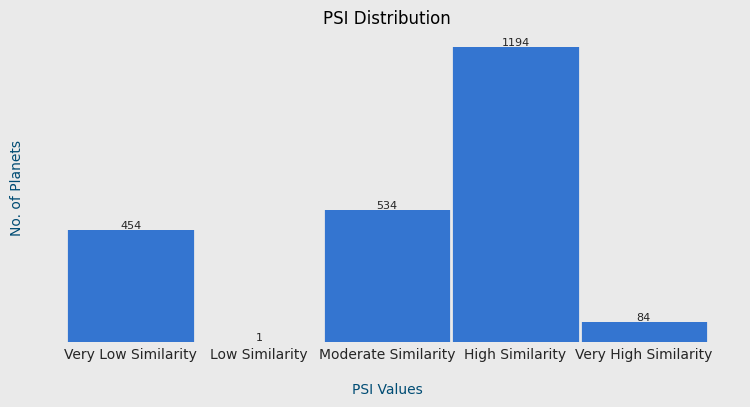

             P.Name  PSI_P_RADIUS  PSI_P_MASS  PSI_P_ESCAPE  PSI_P_TEMP_SURF  \
3786   Kepler-442 b          0.94        0.97          0.94             0.75   
2598  Kepler-1544 b          0.85        0.93          0.90             0.85   
2736  Kepler-1653 b          0.79        0.90          0.87             0.98   
3700   Kepler-395 c          0.95        0.97          0.95             0.64   
2418  Kepler-1410 b          0.85        0.93          0.90             1.00   
2389  Kepler-1389 b          0.86        0.93          0.90             0.67   
3398   Kepler-283 c          0.85        0.92          0.90             0.88   
5210      tau Cet e          0.85        0.93          0.90             0.73   
3781   Kepler-438 b          0.99        1.00          0.99             0.77   
3787   Kepler-443 b          0.77        0.89          0.86             0.88   
1129     HD 85512 b          0.87        0.94          0.91             0.56   
3784   Kepler-440 b          0.83       

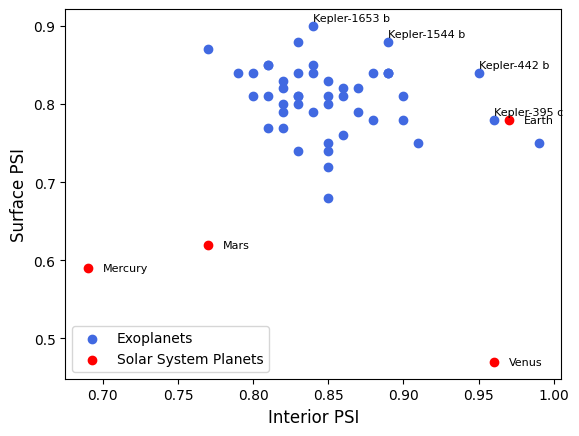

In [14]:
options = {}
options['strings_to_formulas'] = False
options['strings_to_urls'] = False
writer = pd.ExcelWriter("PSI_example.xlsx",engine='xlsxwriter',options=options)
planet_count=[]
PSI_data = exopsi.calc_psi(P_df[['P_RADIUS','P_MASS','P_ESCAPE','P_TEMP_SURF','S_TEMPERATURE','S_RADIUS','S_MASS','S_LUMINOSITY']],
                            upper_lims,lower_lims,ref_val,0.8,
                            surf_param=['P_ESCAPE','P_TEMP_SURF','S_TEMPERATURE','S_RADIUS','S_MASS','S_LUMINOSITY'],
                            int_param=['P_RADIUS','P_MASS'],
                            p_index=P_df.loc[:,'P_NAME'])
solar_system_data = exopsi.calc_psi(solar_system_df[['P_RADIUS','P_MASS','P_ESCAPE','P_TEMP_SURF','S_TEMPERATURE','S_RADIUS','S_MASS','S_LUMINOSITY']],
                            upper_lims,lower_lims,ref_val,0.8,
                            surf_param=['P_ESCAPE','P_TEMP_SURF','S_TEMPERATURE','S_RADIUS','S_MASS','S_LUMINOSITY'],
                            int_param=['P_RADIUS','P_MASS'],
                            p_index=solar_system_df.loc[:,'P_NAME'])

exopsi.psi_dist(PSI_data)
PSI_data = PSI_data.query('PSI_P_TEMP_SURF >= 0.5')
PSI_data = PSI_data.query('PSI_P_RADIUS >= 0.5')
PSI_data = PSI_data.query('PSI_P_MASS >= 0.5')
PSI_data = PSI_data.query('PSI_P_ESCAPE >= 0.5')
PSI_data = PSI_data.query('PSI_S_TEMPERATURE >= 0.5')
PSI_data = PSI_data.query('PSI_S_RADIUS >= 0.5')
PSI_data = PSI_data.query('PSI_S_MASS >= 0.5')
PSI_data = PSI_data.query('PSI_S_LUMINOSITY >= 0.5')
no_of_planets = len(PSI_data)
solar_system_data = solar_system_data.query('PSI_Global >= 0.6')
PSI_data = PSI_data.sort_values('PSI_Global', ascending = False)
print(PSI_data)
planet_count.append(no_of_planets)
PSI_data.to_excel(writer,index=False)
fig,ax = plt.subplots()
ax.scatter(x=PSI_data['PSI_Interior'], y=PSI_data['PSI_Surface'], color="royalblue")
ax.scatter(x=solar_system_data['PSI_Interior'], y=solar_system_data['PSI_Surface'], color="red")
plt.xlabel("Interior PSI", fontsize=12, fontweight="roman")
plt.ylabel("Surface PSI", fontsize=12, fontweight="roman")
plt.xticks(fontweight="roman")
plt.yticks(fontweight="roman")
plt.legend(['Exoplanets','Solar System Planets'])
for (x,y,text) in zip(solar_system_data['PSI_Interior'],solar_system_data['PSI_Surface'], solar_system_data['P.Name']):
    plt.text(x+0.01,y,text, fontsize=8,horizontalalignment='left', verticalalignment='center')
for (x,y,text) in zip(PSI_data.loc[PSI_data.index[0:4],'PSI_Interior'],PSI_data.loc[PSI_data.index[0:4],'PSI_Surface'], PSI_data.loc[PSI_data.index[0:5],'P.Name']):
    plt.text(x,y+0.01,text, fontsize=8,horizontalalignment='left', verticalalignment='center')
       
plt.show()
writer.save()

In [ ]:
print(solar_system_data)

    P.Name  PSI_P_RADIUS  PSI_P_MASS  PSI_P_ESCAPE  PSI_P_TEMP_SURF  \
0  Mercury          0.68        0.71          0.53             0.31   
1    Venus          0.96        0.96          0.90             0.05   
2    Earth          0.97        0.97          0.93             0.96   
3     Mars          0.78        0.77          0.59             0.38   

   PSI_S_TEMPERATURE  PSI_S_RADIUS  PSI_S_MASS  PSI_S_LUMINOSITY  \
0               0.71          0.72        0.66              0.75   
1               0.71          0.72        0.66              0.75   
2               0.71          0.72        0.66              0.75   
3               0.71          0.72        0.66              0.75   

   PSI_Interior  PSI_Surface  PSI_Global  
0          0.69         0.59        0.64  
1          0.96         0.47        0.67  
2          0.97         0.78        0.87  
3          0.77         0.62        0.69  
